In [19]:
import numpy as np
import rasterio as rio
# from os.path import join, basename
import matplotlib.pyplot as plt
from matplotlib import colors, colormaps
import matplotlib.ticker as mticker

import sys
sys.path.append("..")
from utils import (
    DATA_PATH,
    version,
    # geo_slices,
    slice_tropics,
    # modis_files,
    # modis_folder,
    # dense_vegetation
)

terra = rio.open(DATA_PATH + "/terraaqua.tif", 'r').read(1)
cmap_terra = colors.ListedColormap(['white', '#D7D7D7FF'])

In [34]:
tcrit_map = rio.open(DATA_PATH + '/outputs/Tcrit_map_mean_1981_2010_v15.tif', 'r').read(1)
tcrit_map.shape

(21122, 43199)

In [35]:
print(np.nanmin(tcrit_map), np.nanmax(tcrit_map))

37.41881760486856 54.9583636836448


Text(0, 0.5, 'Tcrit')

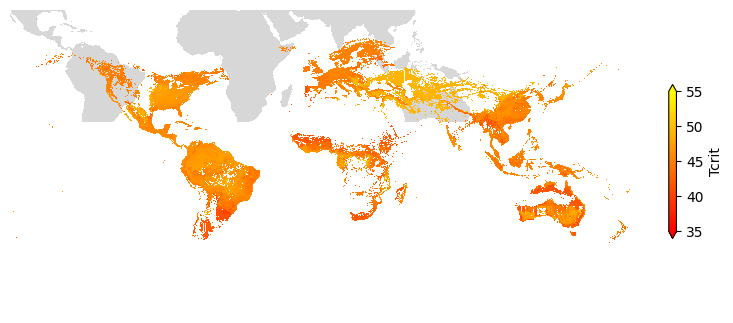

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.imshow(terra[slice_tropics], cmap=cmap_terra)

minn = 35
maxx = 55
im = ax.imshow(tcrit_map, cmap='autumn', interpolation='none')
im.set_clim(minn, maxx)
ax.set_axis_off()
cbar = fig.colorbar(
    im, extend='both', shrink=0.4)#, ticks = [-5, 0, 10, 25],
    # format= mticker.FixedFormatter([f'-5°C', '0 °C', '10 °C', f'25 °C']),)
cbar.ax.set_ylabel('Tcrit', rotation=90)
# plt.savefig("figures/resubmission/TSM2020.png", bbox_inches='tight')

In [ ]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. 
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {'red': [], 'green': [], 'blue': [], 'alpha': []}
    reg_index = np.linspace(start, stop, 257)
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)
        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
    newcmap = colors.LinearSegmentedColormap(name, cdict)
    return newcmap

In [4]:
tsm_2020_map = np.load(DATA_PATH + f"/outputs/TSM_2020{version}.npy")
tsm_2020_map.shape

(7794, 32198)

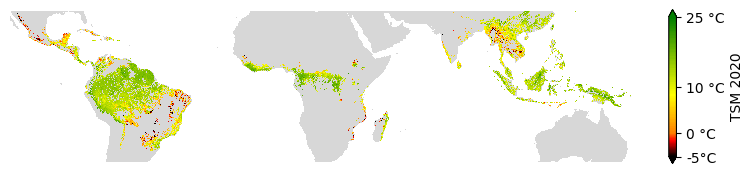

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.imshow(terra[slice_tropics], cmap=cmap_terra)

colors_ = [(0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 0.5, 0)]
cmap_tsm = colors.LinearSegmentedColormap.from_list('tsm', colors_, N=100)
minn = -5
maxx = 25
cmap_tsm_shifted = shiftedColorMap(cmap_tsm, midpoint=(-minn)/(maxx - minn), name='tsm_shifted')
cmap_tsm_shifted.set_bad(alpha=0)
im = ax.imshow(tsm_2020_map, cmap=cmap_tsm_shifted, interpolation='none')
im.set_clim(minn, maxx)
ax.set_axis_off()
cbar = fig.colorbar(
    im, extend='both', shrink=0.4, ticks = [-5, 0, 10, 25],
    format= mticker.FixedFormatter([f'-5°C', '0 °C', '10 °C', f'25 °C']),)
cbar.ax.set_ylabel('TSM 2020', rotation=90)
plt.savefig("figures/resubmission/TSM2020.png", bbox_inches='tight')

In [21]:
lr_tsm_map = np.load(DATA_PATH + '/outputs/LinearRegression_TSM_2001_2020_v15.npy')
lr_tsm_map.shape

(7794, 32198)

In [23]:
print(np.nanquantile(lr_tsm_map, [0,0.01,0.99,1]))

[-1.26375631 -0.34226974  0.17870066  1.20399005]


In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.imshow(terra[slice_tropics], cmap=cmap_terra)

colors_ = [(1, 0, 0), (1,0.5,0), (0.9, 0.85, 0), (0, 0.5, 0), (0,0,1)]
cmap_lr = colors.LinearSegmentedColormap.from_list('lr_tsm', colors_, N=100)
minn = -0.34
maxx = 0.18
cmap_lr_shifted = shiftedColorMap(cmap_lr, midpoint=(-minn)/(maxx - minn), name='tsm_shifted')
cmap_lr_shifted.set_bad(alpha=0)
im = ax.imshow(lr_tsm_map, cmap=cmap_lr_shifted, interpolation='none')
im.set_clim(minn, maxx)
ax.set_axis_off()
cbar = fig.colorbar(
    im, extend='both', shrink=0.4, ticks = [-0.3, 0, 0.15],
    format= mticker.FixedFormatter([-0.3,0,0.15]),)
cbar.ax.set_ylabel('TSM slope 2001-2020', rotation=90)
plt.savefig("figures/resubmission/LinearRegression_TSM_2001_2020.png", bbox_inches='tight')

Error in callback <function flush_figures at 0x7f6b77754360> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [31]:
tsm_2020_sa_gaston = tsm_2020_sa_gaston[...,-1]
print(np.nanmin(tsm_2020_sa_gaston), np.nanmax(tsm_2020_sa_gaston), np.nanmean(tsm_2020_sa_gaston))

-1051.0881 15.900008 -9.938566


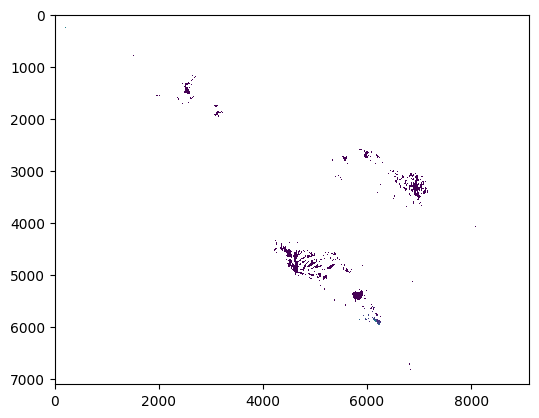

: 

In [ ]:
plt.imshow(tsm_2020_sa_gaston, vmin=-5, vmax=10)

In [26]:
print(np.nanmin(mean_tcrit_map), np.nanmax(mean_tcrit_map))
print(np.nanmin(mean_tcrit_map_gaston), np.nanmax(mean_tcrit_map_gaston))

37.41881760486856 54.9583636836448
37.41881760486856 54.9583636836448


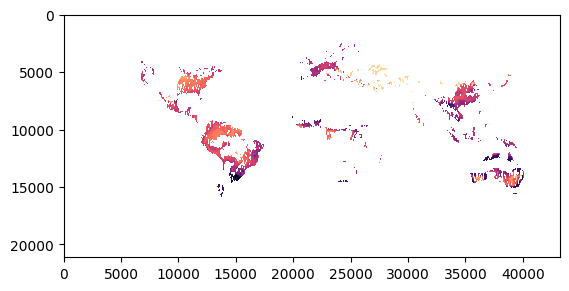

In [22]:
plt.imshow(mean_tcrit_map, vmin=40, vmax=50, cmap='magma')

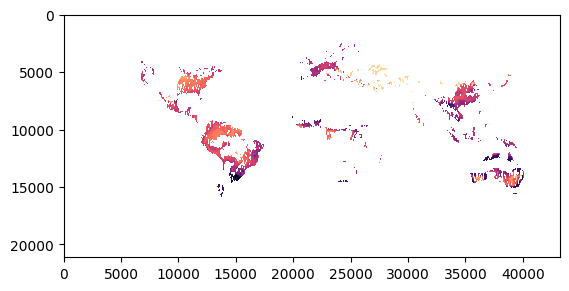

In [27]:
plt.imshow(mean_tcrit_map_gaston, vmin=40, vmax=50, cmap='magma')

In [3]:
data_both_biomes = np.zeros(mean_tcrit_map.shape, dtype=bool)
biomes = [
    "Tropical & Subtropical Moist Broadleaf Forests",
    "Tropical & Subtropical Dry Broadleaf Forests",
]
biome_files = [join(DATA_PATH, f"Ecoregions2017/{b}.tif") for b in biomes]
for biome_file in biome_files:
    data_biome = rio.open(biome_file, "r").read(1).squeeze()
    data_biome = data_biome.astype(bool)
    data_both_biomes += data_biome

In [18]:
tsm_map = np.zeros_like(data_both_biomes).astype(float)
tsm_map[:,:] = np.nan
for continent, slice in geo_slices.items():        
    tsm_file = DATA_PATH + f"/outputs/TSM_2001_2020_{continent}_{version}.npy"
    tsm_2020 = np.load(tsm_file)[...,-1]
    tsm_2020[~data_both_biomes[slice]] = np.nan
    tsm_2020[~dense_vegetation[slice]] = np.nan
    tsm_map[slice] = tsm_2020

In [24]:
geo_slices.keys()

dict_keys(['south_east_asia', 'south_america', 'africa'])

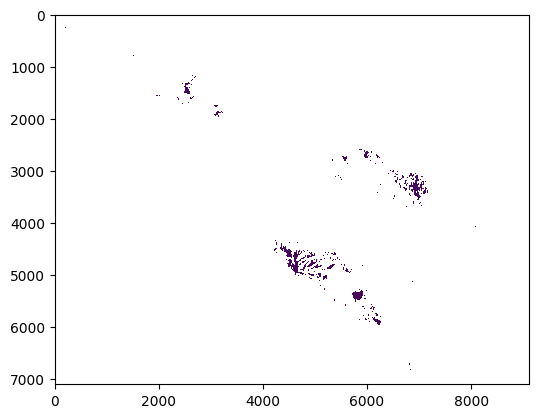

In [25]:
continent = 'south_america'
tsm_file = DATA_PATH + f"/outputs/TSM_2001_2020_{continent}_{version}.npy"
tsm_2020 = np.load(tsm_file)[...,-1]
plt.imshow(tsm_2020)

In [27]:
print(np.nanmin(tsm_2020), np.nanmax(tsm_2020))

-15.900008 1051.0881


In [28]:
print(np.nanmin(mean_tcrit_map), np.nanmax(mean_tcrit_map))

37.41881760486856 54.9583636836448


In [34]:
src = rio.open(join(modis_folder, basename(modis_files[-1])), "r")
m = src.read(1)

In [37]:
dense_vegetation.shape

(21122, 43199)

In [38]:
data_both_biomes.shape

(21122, 43199)

In [39]:
np.isnan(m).sum()

0

In [41]:
m[dense_vegetation == 0] = np.nan
m[~data_both_biomes] = np.nan
m[m == -1000] = np.nan

In [47]:
mean_tcrit_map.shape

(21122, 43199)

In [49]:
tsm = mean_tcrit_map[slice] - m[slice]

In [52]:
print(np.nanmin(tsm), np.nanmax(tsm))

-14.930009765625002 26.6480000203885


In [51]:
tsm.shape[0] * tsm.shape[1]

34595421

In [45]:
np.isnan(m).sum() / (m.shape[0] * m.shape[1])

0.9797249727233606

In [36]:
m.max()

61.649994

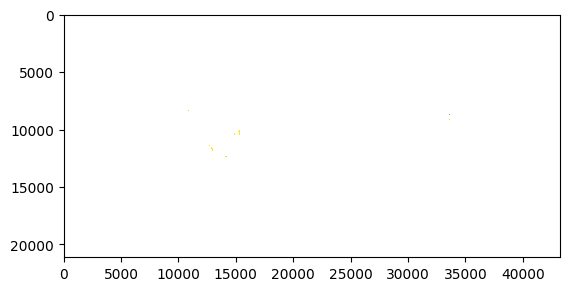

In [23]:
plt.imshow(tsm_map, vmin=-5, vmax= 10)

In [4]:
for continent, slice in geo_slices.items():        
    break

In [5]:
tsm_file = DATA_PATH + f"/outputs/TSM_2001_2020_{continent}_{version}.npy"
tsm_2020 = np.load(tsm_file)[...,-1]
tsm_2020[~data_both_biomes[slice]] = np.nan
tsm_2020.shape

(5018, 9999)

In [9]:
np.where(dense_vegetation[slice] != 0)

(array([   0,    0,    0, ..., 5017, 5017, 5017]),
 array([ 320,  321,  322, ..., 8521, 8522, 8526]))

In [14]:
np.where(~np.isnan(tsm_2020[np.where(dense_vegetation[slice] != 0)]))

(array([    381,     382,     383, ..., 6060019, 6060081, 6060082]),)

In [16]:
tsm_2020[np.where(dense_vegetation[slice] != 0)][381]

19.424603

In [ ]:
np.where(dense_vegetation[slice] != 0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
np.all(np.isnan(tsm_2020[~dense_vegetation[slice]]))

MemoryError: Unable to allocate 1.83 TiB for an array with shape (5018, 9999, 9999) and data type float32